In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

이 절에서는 제한조건(constraint)을 가지는 최적화 문제를 풀어본다. 제한조건은 연립방정식 또는 연립부등식이다. 연립방정식 제한조건이 있는 경우에는 라그랑주 승수법을 사용하여 새로운 최적화 문제를 풀어야 한다. 연립부등식 제한조건의 경우에는 KKT 조건이라는 것을 만족하도록 하는 복잡한 과정을 거쳐야 한다.

### 등식 제한조건이 있는 최적화 문제

현실의 최적화 문제에서는 여러가지 제한조건이 있는 최적화(constrained optimization) 문제가 많다. 가장 간단한 경우는 다음과 같이 연립방정식 제한조건이 있는 경우다. 등식(equality) 제한조건이라고도 한다.

$$x^{\ast} = \text{arg} \min_x f(x)$$

$$x \in \mathbf{R}^N$$

$$g_j(x) = 0 \;\; (j=1, \ldots, M)$$


위의 첫번째 식만 보면 단순히 목적함수  𝑓(𝑥) 를 가장 작게 하는  𝑁 차원 벡터  𝑥 값을 찾는 문제다. 하지만 두번째 식에 있는  𝑀 개의 등식 제한 조건이 있으면  𝑀 개 연립 방정식

\begin{aligned}
g_1(x) &= 0 \\
g_2(x) &= 0 \\
&\vdots \\
g_M(x) &= 0 \\
\end{aligned}

를 동시에 모두 만족시키면서 목적함수  𝑓(𝑥) 를 가장 작게 하는  𝑥 값을 찾아야 한다.

#### 예제
목적 함수  𝑓 와 등식 제한조건  𝑔 이 다음과 같은 경우를 생각하자.

$$f(x_1, x_2) = x_1^2 + x_2^2 $$

$$ g(x_1, x_2) = x_1 + x_2 - 1 = 0 $$


이 문제는 다음 그림과 같이  𝑔(𝑥1,𝑥2)=0 으로 정의되는 직선상에서 가장  𝑓(𝑥1,𝑥2) 값이 작아지는 점  (𝑥∗1,𝑥∗2) 를 찾는 문제가 된다.

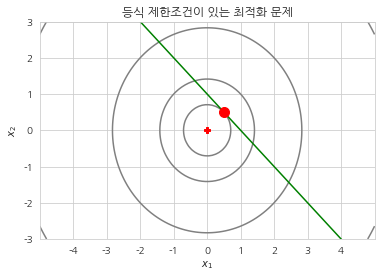

In [8]:
# 목적함수 f(x)
def f(x1, x2):
    return x1**2 + x2**2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)

# 등식 제한조건 방정식
x2_g = 1 - x1

plt.contour(X1, X2, Y, colors='gray', levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("등식 제한조건이 있는 최적화 문제")
plt.show()

### 라그랑주 승수법
이렇게 등식 제한조건이 있는 최적화 문제는 라그랑주 승수법(Lagrange multiplier)을 사용하여 최적화할 수 있다.

라그랑주 승수 방법에서는 목적함수를 원래의 목적함수  𝑓(𝑥) 를 사용하지 않는다. 대신 제한조건 등식에  𝜆 라는 새로운 변수를 곱해서 더한 함수

\begin{align}
\begin{aligned}
h(x, \lambda) 
&= h(x_1, x_2, \ldots , x_N, \lambda_1, \ldots , \lambda_M) \\
&= f(x) + \sum_{j=1}^M \lambda_j g_j(x)
\end{aligned}
\end{align}

를 목적함수로 간주하여 최적화한다. 

##### 그레디언트 벡터를 영벡터로 만드는 최적화 필요조건이 N개에서 N+M개가 됨
이때 제한조건 등식 하나마다 새로운  𝜆𝑖 를 추가해주어야 한다. 따라서 만약 제한조건이  𝑀 개이면  𝜆1,⋯,𝜆𝑀 개의 변수가 새로 생긴 것과 같다. 이렇게 확장된 목적함수  ℎ 는 입력변수가 더 늘어났기 때문에 그레디언트 벡터를 영벡터로 만드는 최적화 필요 조건이 다음과 같이  𝑁+𝑀 개가 된다.

\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= \dfrac{\partial f}{\partial x_1} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_1} = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= \dfrac{\partial f}{\partial x_2} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_2} = 0 \\
& \vdots  \\
\dfrac{\partial h}{\partial x_N} 
&= \dfrac{\partial f}{\partial x_N} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_N} = 0 \\
\dfrac{\partial h}{\partial \lambda_1} 
&= g_1 = 0 \\
& \vdots  \\
\dfrac{\partial h}{\partial \lambda_M} 
&= g_M = 0 
\end{aligned}

이  𝑁+𝑀 개의 연립 방정식을 풀면  𝑁+𝑀 개의 미지수

$$x_1, x_2, \ldots, x_N, , \lambda_1, \ldots , \lambda_M$$

를 구할 수 있다. 구한 결과에서

$$x_1, x_2, \cdots, x_N$$

이 우리가 찾는 최소값  𝑥 이다. 라그랑주 승숫값 λ 은 필요없다.

#### 예제

위에서 제시한 예제를 라그랑주 승수법으로 풀어보자. 새로운 목적함수는 다음과 같다.

\begin{align}
h(x_1, x_2, \lambda) 
= f(x_1, x_2) + \lambda g(x_1, x_2) 
= x_1^2 + x_2^2 + \lambda ( x_1 + x_2 - 1 ) 
\end{align}

라그랑지 승수법을 적용하여 그레디언트 벡터가 영벡터인 위치를 구한다.

\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= 2{x_1} + \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= 2{x_2} + \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&= x_1 + x_2 - 1 = 0 
\end{aligned}

위 방정식을 풀면 해는 다음과 같다.

$$x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = -1$$

### Practice 1

제한조건이

$$x_1 + x_2 = 1$$

일 때 목적 함수

$$f(x) = - \log{x_1} - \log{x_2}$$

$$x_1, x_2 > 0$$

을 최소화하는  𝑥1 ,  𝑥2  값을 라그랑주 승수법으로 계산하라.


### Practice 2

제한조건이

$$x_1^2 + x_2^2 = 1$$
일 때 목적 함수

$$f(x) = x_1 + x_2$$

를 최소화하는  𝑥1 ,  𝑥2  값을 라그랑주 승수법으로 계산하라.

### Scipy를 이용하여 등식 제한조건이 있는 최적화 문제 계산하기

Scipy의 optimize 서브패키지는 제한조건이 있는 최적화 문제를 푸는 fmin_slsqp 명령을 제공한다.

fmin_slsqp(func_objective, x0, eqcons=[func_constraint1, func_constraint2])

fmin_slsqp 명령은 목적함수와 초깃값, 그리고 제한조건 함수의 리스트를 인수로 받는다. 목적함수는 배열인 인수를 받도록 구현되어야 하고 제한조건 함수의 경우에는 항상 eqcons 인수를 명시해야 한다.

In [9]:
import scipy as sp

#### 예제
다음은 위 예제를 fmin_slsqp 명령으로 푸는 코드다.

In [11]:
# 목적함수 재정의(배열인수 구현)
def f1array(x):  # x는 배열, x[0] = x1, x[1] = x2
    return x[0]**2 + x[1]**2

def eq_constraint(x):
    return x[0] + x[1] - 1


sp.optimize.fmin_slsqp(f1array, np.array([1, 1]), eqcons=[eq_constraint])  # eqcons 인수는 리스트 형식으로 입력해 줘야 함

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([0.5, 0.5])

### 라그랑주 승수의 의미

만약 최적화 문제에서 등식 제한조건  𝑔𝑖 이 있는가 없는가에 따라 해의 값이 달라진다면 이 등식 제한조건에 대응하는 라그랑주 승수  𝜆𝑖 는 0이 아닌 값이어야 한다.
$$\lambda_i \neq 0$$ 


𝜆𝑖=0 일 때만 원래의 문제와 제한조건이 있는 문제의 최적화 조건이 같아지므로 최적화 해의 위치도 같게 나오기 때문이다.

#### 예제
목적함수가
$$f(x) = x_1^2 + x_2^2$$

인 최소화 문제의 답은

$$x_1 = x_2 = 0$$

이다.

여기에 다음 제한조건이 있다고 하자.

$$g(x_1, x_2) = x_1 + x_2 = 0$$

라그랑주 승수법에서 새로운 목적함수는

$$h(x_1, x_2, \lambda) 
= f(x_1, x_2) + \lambda g(x_1, x_2) 
= x_1^2 + x_2^2 + \lambda ( x_1 + x_2)$$

이고 최적화 조건은

\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= 2{x_1} + \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= 2{x_2} + \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&= x_1 + x_2 = 0 
\end{aligned}

이를 풀면

$$x_1 = x_2 = \lambda = 0$$

로 제한조건이 있으나 없으나 해는 같고 라그랑지 승수가 0이다.


### 부등식 제한조건이 있는 최적화 문제

이번에는 다음과 같이 부등식(inequality) 제한조건이 있는 최적화 문제를 생각하자.

\begin{align}
x^{\ast} = \text{arg} \min_x f(x) 
\end{align}

$$x \in \mathbf{R}^N$$

\begin{align}
g_j(x) \leq 0 \;\; (j=1, \ldots, M)  
\end{align}

만약 부등식이

$$g_j(x) \geq 0$$

과 같다면 양변에 -1을 곱하여 부등호의 방향을 바꾼다.

이렇게 부등식 제한조건이 있는 최적화 문제도 라그랑지 승수 방법과 목적함수를 다음과 같이 바꾸어 푼다.

$$h(x, \lambda) = f(x) + \sum_{j=1}^M \lambda_j g_j(x)$$

다만 이 경우, 최적화 해의 필요조건은 방정식 제한조건이 있는 최적화 문제와 다르게 KKT(Karush-Kuhn-Tucker) 조건이라고 하며 다음과 같이 3개의 조건으로 이루어진다.

(1) 모든 독립 변수  𝑥1,𝑥2,…,𝑥𝑁 에 대한 미분값이 0이다.

\begin{align}
\dfrac{\partial h(x, \lambda)}{\partial x_i} = 0 
\end{align}

(2) 모든 라그랑주 승수  𝜆1,…,𝜆𝑀 과 제한조건 부등식( 𝜆 에 대한 미분값)의 곱이 0이다.

\begin{align}
\lambda_j \cdot \dfrac{\partial h(x, \lambda)}{\partial \lambda_j} = \lambda_j \cdot g_j = 0 
\end{align}

(3) 라그랑주 승수는 음수가 아니어야 한다.

\begin{align}
\lambda_j \geq 0 
\end{align}

첫 번째 조건은 방정식 제한조건의 경우와 같다. 다먄 변수  𝑥 들에 대한 미분값만 0이어야 한다. 라그랑지 승수  𝜆 에 대한 미분은 0이 아니어도 된다.

두 번째 조건을 보면 확장된 목적함수를 라그랑주 승수로 미분한 값은 변수  𝑥 들에 대한 미분값과는 달리 반드시 0이 될 필요는 없다는 것을 알 수 있다. 이렇게 하려면 두 경우가 가능한데 등식 제한조건의 경우와 같이 라그랑지 승수  𝜆 에 대한 미분값이 0이어도 되고 아니면 라그랑지 승수  𝜆  값 자체가 0이 되어도 된다.

마지막 조건은 KKT 조건이 실제로 부등식 제한조건이 있는 최적화 문제와 같은 문제임을 보장하는 조건이다.

#### 예제
부등식 제한조건을 가지는 최적화의 예를 풀어보자.

목적 함수는

$$f(x_1, x_2) = x_1^2 + x_2^2$$
이다.

이 예제에서는 두가지 제한 조건을 고려해볼 텐데 하나는 다음 그림 중 왼쪽 그림과 같이 부등식 제한조건이

\begin{align}
g(x_1, x_2) = x_1 + x_2 - 1 \leq 0 
\end{align}

이다. 다른 하나는 오른쪽 그림과 같이 부등식 제한조건이

\begin{align}
g(x_1, x_2) = -x_1 - x_2 + 1 \leq 0 
\end{align}

인 경우다. 이 그림에서는 제한조건을 만족하는 영역을 어둡게 표시했다.

최적점의 위치는 점으로 표시했다. 첫 번째 제한조건의 경우에는 부등식 제한조건이 있기는 하지만 원래의 최적화 문제의 해가 부등식 제한조건이 제시하는 영역 안에 있기 때문에 최적점의 위치가 달라지지 않는다. 두 번째 제한조건의 경우에는 원래의 최적화 문제의 해가 부등식 제한조건이 제시하는 영역 바깥에 있기 때문에 최적점의 위치가 달라졌다. 하지만 최적점의 위치가 영역의 경계선(boundary line)에 있다는 점에 주의하라.

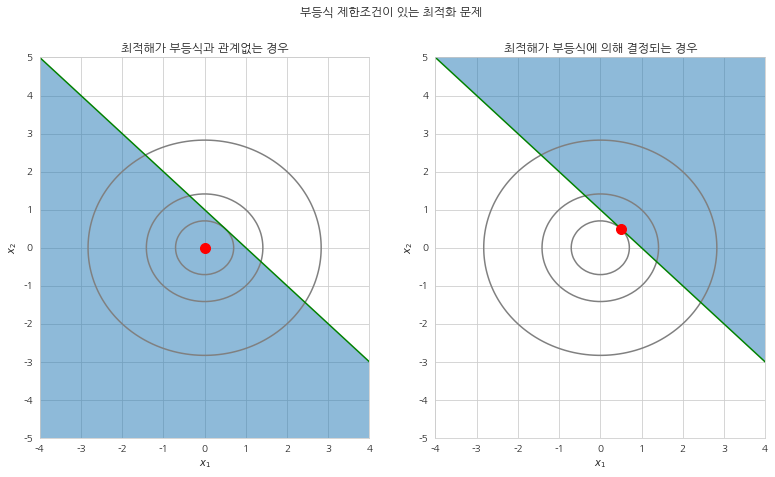

In [22]:
plt.figure(figsize=(13, 7))
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식과 관계없는 경우")
ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.title("최적해가 부등식에 의해 결정되는 경우")
plt.suptitle("부등식 제한조건이 있는 최적화 문제")
plt.show()

그림에서 보듯이 부등식 제한조건이 있는 최적화 문제를 풀면 그 제한조건은 다음 두 가지 경우의 하나가 되어 버린다.

+ 최적화 결과에 전혀 영향을 주지 않는 쓸모없는 제한조건
+ 최적화 결과에 영향을 주는 등식(equality)인 제한조건

어느 경우이든 부등식 제한조건 문제로 시작했지만 결과는 제한조건이 없거나 등식 제한조건 문제를 푸는 것과 같아진다.

KKT 조건 중 두 번째 조건이 뜻하는 바는 다음과 같다. 다음 식에서  𝑥∗,𝜆∗ 는 KKT 조건을 풀어서 구한 최적해의 값이다.

\begin{align}
\lambda^{\ast} = 0 \;\; \text{or} \;\;  g(x^{\ast}) = 0 
\end{align}

만약  𝑔𝑖=0 이면 이 조건은 부등식 제한조건이 아닌 등식 제한조건이 된다. 그리고 등식 제한조건에서 말한 바와 같이 (이 제한조건이 있으나 없으나 해가 바뀌지 않는 특수한 경우를 제외하면) 라그랑주 승수는 0이 아닌 값을 가진다.

\begin{align}
g_i = 0 \;\; \rightarrow \;\; \lambda_i \neq 0 \; (\lambda_i > 0)
\end{align}

반대로  𝑔𝑖≠0(𝑔𝑖<0) 이면 해가  𝑔𝑖 가 표현하는 곡선으로부터 떨어져 있기 때문에 부등식 제한조건이 아무런 의미가 없어진다. 즉, 제한조건이 있을 때와 없을 때의 해가 같다. 따라서 목적함수  ℎ(𝑥,𝜆) 는  𝜆𝑖𝑔𝑖(𝑔𝑖≠0)  항이 있으나 없으나 상관없이 같은 해를 가진다. 따라서  𝜆𝑖=0 이 된다.

\begin{align}
g_i \neq 0 \;\; \rightarrow \;\; \lambda_i = 0  
\end{align}

따라서 부등식 제한조건이 있는 최적화 문제는 각 제한조건에 대해 위의 두 가지 경우를 가정하여 각각 풀어보면서 최적의 답을 찾는다.

#### 예제
다음은 복수의 부등식 제한조건이 있는 또다른 2차원 최적화 문제의 예다.

$$\text{arg} \min_x \; (x_1-4)^2 + (x_2-2)^2$$

$$g_1(x) = x_1 + x_2 - 1\leq 0$$

$$g_2(x) = -x_1 + x_2 - 1\leq 0$$

$$g_3(x) = -x_1 - x_2 - 1\leq 0$$

$$g_4(x) = x_1 - x_2 - 1\leq 0$$

이 4개의 제한조건은 다음과 같은 하나의 부등식으로 나타낼 수도 있다.

$$g(x) 
= \left\vert\, x_1 \right\vert + \left\vert\, x_2 \right\vert - 1 
= \sum_{i=1}^{2} \left\vert\, x_i \right\vert - 1 \leq 0$$

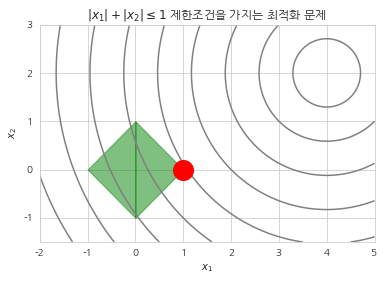

In [28]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)

x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray", levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

# 제한조건의 상수
k = 1
ax = plt.gca()
x12 = np.linspace(-k, 0, 10)
x13 = np.linspace(0, k, 10)
ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

# 최적점 위치
x1_sol = 1
x2_sol = 0
plt.plot(x1_sol, x2_sol, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
plt.show()

### Practice 3
위 예제에서 최적해가

$$x_1 = 1, \; x_2 = 0$$

이라는 사실을 이용하여 라그랑지 승수  𝜆1 ,  𝜆2 ,  𝜆3 ,  𝜆4  중 어느 값이 0이 되는지 알아내라.

### Scipy를 이용하여 부등식 제한조건이 있는 최적화 문제 계산하기
fmin_slsqp 명령은 이렇게 부등식 제한조건이 있는 경우에도 사용할 수 있다. 제한조건 인수의 이름이 ieqcons로 달라졌다.

fmin_slsqp(func_objective, x0, ieqcons=[func_constraint1, func_constraint2])

단 ieqcons 인수에 들어가는 부등호의 부호는 우리가 지금까지 사용한 방식과 달리 0 또는 양수이어야 한다.

$$g \geq 0$$


사실 fmin_slsqp 명령은 등식 제한조건과 부등식 제한조건을 동시에 사용할 수 있다.

In [34]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))  

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.6055512804550336
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([9.99999982e-01, 1.79954011e-08])

최적점은 거의 (1, 0)

### Practice 4
위 문제에서 제한조건을 다음과 같이 바꾼다.

$$g(x) 
= \left\vert\, x_1 \right\vert + \left\vert\, x_2 \right\vert - k 
= \sum_{i=1}^{2} \left\vert\, x_i \right\vert - k \leq 0$$

여기에서  𝑘 의 값을 0.1부터 10까지 다양하게 변화시키면서 최적화의 해가 어떻게 달라지는지 살펴보라.

In [40]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 0.1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))  

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.382922108746309
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11


array([9.99983654e-02, 1.63456102e-06])

In [43]:
# 제한 조건 상수
k = 0.5
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))  

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.031128897766439
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 12


array([4.99999937e-01, 6.34692395e-08])

In [45]:
# 제한 조건 상수
k = 1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))  

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.6055512804550336
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([9.99999982e-01, 1.79954011e-08])

In [46]:
k = 5
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))  

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.7071067910728857
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([3.49991639, 1.50008361])

In [47]:
k = 10
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))  

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.04176407312663e-07
            Iterations: 13
            Function evaluations: 69
            Gradient evaluations: 13


array([3.99999992, 1.9999996 ])